<a href="https://colab.research.google.com/github/SeenaAbdul/Financial-Inclusion-in-Africa/blob/main/African%20BankAccount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in Africa Starter Notebook


This is a simple starter notebook to get started with the Financial Inclusion Competition on Zindi.

This notebook covers:
- Loading the data
- Simple EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a simple model
- Making a submission
- Some tips for improving your score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing libraries

In [ ]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [ ]:
# Load files into a pandas dataframe
train = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/for Practice/Train.csv")
test = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/for Practice/Test.csv")
ss = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/for Practice/SampleSubmission.csv")
variables = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/for Practice/VariableDefinitions.csv")

In [ ]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [ ]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



<Axes: xlabel='bank_account', ylabel='count'>

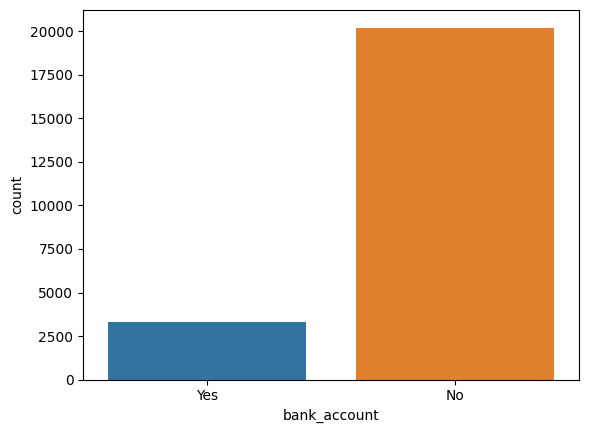

In [ ]:
# Explore Target distribution
sns.countplot(x="bank_account",data=train)

It is important to understand the meaning of each feature so you can really understand the dataset. You can read the VariableDefinition.csv file to understand the meaning of each variable presented in the dataset.

The SampleSubmission.csv gives us an example of how our submission file should look. This file will contain the uniqueid column combined with the country name from the Test.csv file and the target we predict with our model. Once we have created this file, we will submit it to the competition page and obtain a position on the leaderboard.


In [ ]:
# view the submission file
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [ ]:
 #show some information about the dataset
 print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


The output shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.

If you want to learn how to handle missing data in your dataset, we recommend you read How to [Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee.

We won’t go further on understanding the dataset because Davis has already published an article about exploratory data analysis (EDA) with the financial Inclusion in Africa dataset. You can read and download the notebook for EDA in the link below.

[Why you need to explore your data and how you can start](https://https://medium.com/analytics-vidhya/why-you-need-to-explore-your-data-how-you-can-start-13de6f29c8c1)

In [ ]:
# Let's view the variables
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


#### Univariate Analysis on categorical variables

In [ ]:
# get all cetergorical variable in a list

In [ ]:
cat=train.dtypes[train.dtypes=="object"].index

In [ ]:
num=train.dtypes[train.dtypes!="object"].index


In [ ]:
for i in range(0,len(cat)):
  print(f"No of categories in {cat[i]} : {train[cat[i]].nunique()}")


No of categories in country : 4
No of categories in uniqueid : 8735
No of categories in bank_account : 2
No of categories in location_type : 2
No of categories in cellphone_access : 2
No of categories in gender_of_respondent : 2
No of categories in relationship_with_head : 6
No of categories in marital_status : 5
No of categories in education_level : 6
No of categories in job_type : 10


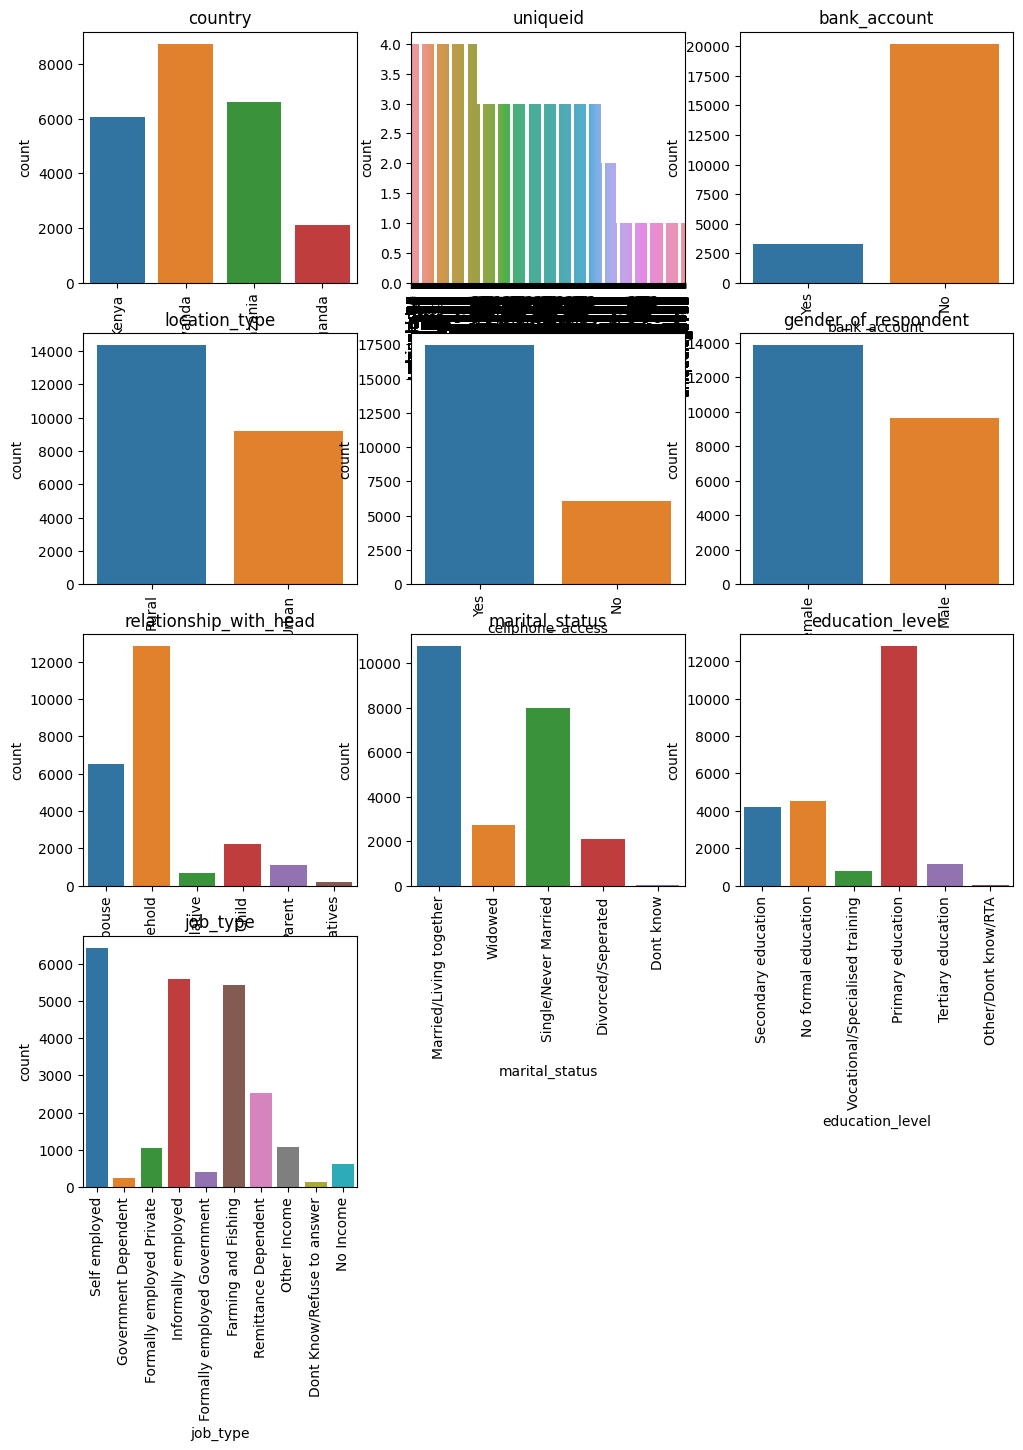

In [ ]:
plt.figure(figsize=(12,15))
for i in range(0,len(cat)):
    p=i+1
    plt.subplot(4,3,p)
    sns.countplot(x=cat[i],data=train)
    plt.title(cat[i])
    plt.xticks(rotation=90)
plt.show()

#### Univariate analysis on numerical variable


In [ ]:
train[num].describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


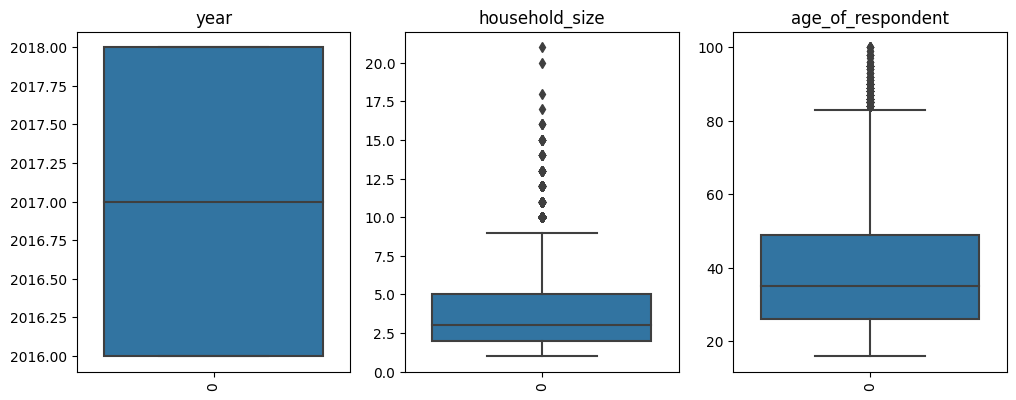

In [ ]:
plt.figure(figsize=(12,15))
for i in range(0,len(num)):
    p=i+1
    plt.subplot(3,3,p)
    sns.boxplot(train[num[i]])
    plt.title(num[i])
    plt.xticks(rotation=90)
plt.show()

In [ ]:
## Outliers found in house hold size and age of respondent

#### Bivariate analysis on categorical variable

<Axes: xlabel='country', ylabel='count'>

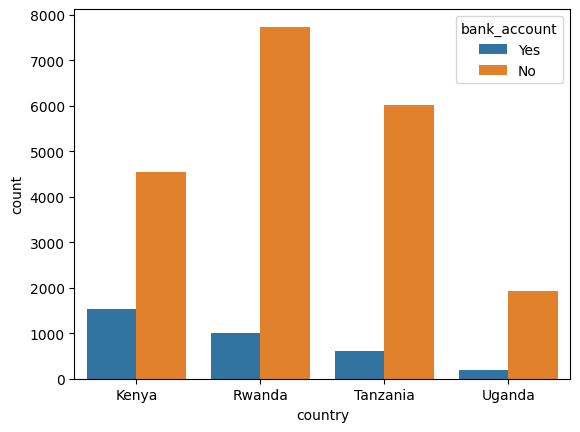

In [ ]:
sns.countplot(x="country",data=train,hue="bank_account")

<Axes: xlabel='household_size', ylabel='count'>

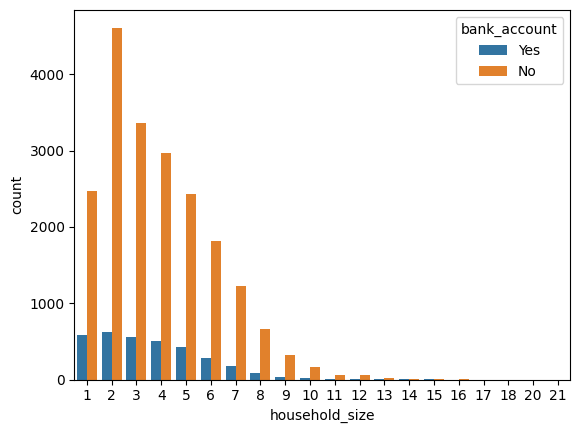

In [ ]:
sns.countplot(x="household_size",data=train,hue="bank_account")

In [ ]:
#sns.lineplot(train["household_size"],train["bank_account"])
pd.crosstab(train["household_size"],train["bank_account"],normalize="index")

bank_account,No,Yes
household_size,,
1,0.808963,0.191037
2,0.881622,0.118378
3,0.857398,0.142602
4,0.855786,0.144214
5,0.850333,0.149667
6,0.867844,0.132156
7,0.873571,0.126429
8,0.885486,0.114514
9,0.898072,0.101928


In [ ]:
pd.crosstab(train["country"],train["bank_account"],normalize="index")

bank_account,No,Yes
country,,
Kenya,0.749341,0.250659
Rwanda,0.885175,0.114825
Tanzania,0.908308,0.091692
Uganda,0.913851,0.086149


In [ ]:
pd.crosstab(train["location_type"],train["bank_account"],normalize="index")

bank_account,No,Yes
location_type,,
Rural,0.883497,0.116503
Urban,0.821261,0.178739


In [ ]:
pd.crosstab(train["cellphone_access"],train["bank_account"],normalize="index")

bank_account,No,Yes
cellphone_access,,
No,0.982867,0.017133
Yes,0.816203,0.183797


In [ ]:
pd.crosstab(train["gender_of_respondent"],train["bank_account"],normalize="index")

bank_account,No,Yes
gender_of_respondent,,
Female,0.893205,0.106795
Male,0.810304,0.189696


In [ ]:
pd.crosstab(train["relationship_with_head"],train["bank_account"],normalize="index")

bank_account,No,Yes
relationship_with_head,,
Child,0.913414,0.086586
Head of Household,0.822851,0.177149
Other non-relatives,0.894737,0.105263
Other relative,0.901198,0.098802
Parent,0.940147,0.059853
Spouse,0.893405,0.106595


In [ ]:
pd.crosstab(train["education_level"],train["bank_account"],normalize="index")

bank_account,No,Yes
education_level,,
No formal education,0.961019,0.038981
Other/Dont know/RTA,0.685714,0.314286
Primary education,0.914549,0.085451
Secondary education,0.767227,0.232773
Tertiary education,0.489196,0.510804
Vocational/Specialised training,0.429639,0.570361


In [ ]:
pd.crosstab(train["job_type"],train["bank_account"],normalize="index")

bank_account,No,Yes
job_type,,
Dont Know/Refuse to answer,0.888889,0.111111
Farming and Fishing,0.883294,0.116706
Formally employed Government,0.224806,0.775194
Formally employed Private,0.458768,0.541232
Government Dependent,0.797571,0.202429
Informally employed,0.920493,0.079507
No Income,0.979266,0.020734
Other Income,0.818519,0.181481
Remittance Dependent,0.905026,0.094974


In [ ]:
pd.crosstab(train["marital_status"],train["bank_account"],normalize="index")


bank_account,No,Yes
marital_status,,
Divorced/Seperated,0.887283,0.112717
Dont know,0.750000,0.250000
Married/Living together,0.826402,0.173598
Single/Never Married,0.878993,0.121007
Widowed,0.909897,0.090103


## Summary of above analysis says that it is unlikely for no income,less educated,widowed person from rural areas of uganda or Tanzania to have a bank account

### Correlation

In [ ]:
cor_data=train.corr()

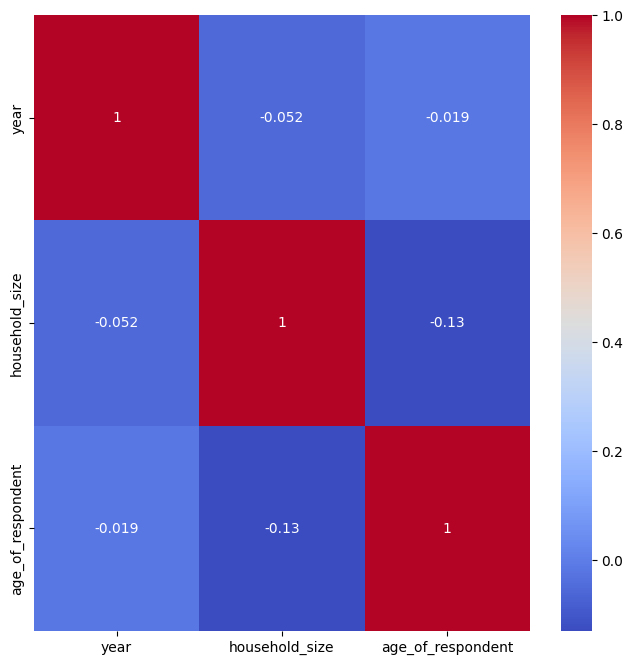

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cor_data,cmap="coolwarm",annot=True)
plt.show()

In [ ]:
cor_data

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


# Feature Engineering-Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

## Label Encoding

In [ ]:
le = LabelEncoder()
train1=train.copy()
test1=test.copy()

In [ ]:
train1["location_type"] = le.fit_transform(train1["location_type"])
train1["cellphone_access"] = le.fit_transform(train1["cellphone_access"])
train1["gender_of_respondent"] = le.fit_transform(train1["gender_of_respondent"])
test1["location_type"] = le.fit_transform(test1["location_type"])
test1["cellphone_access"] = le.fit_transform(test1["cellphone_access"])
test1["gender_of_respondent"] = le.fit_transform(test1["gender_of_respondent"])

##Dummy creation or One Hot Encoding

In [ ]:
train_dum=pd.get_dummies(train1,columns=["country","bank_account",'relationship_with_head','marital_status','education_level','job_type'],drop_first=True)

In [ ]:
test_dum=pd.get_dummies(test1,columns=["country",'relationship_with_head','marital_status','education_level','job_type'],drop_first=True)

In [ ]:
train_dum.head()

,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,uniqueid_1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,uniqueid_2,0,0,5,70,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,uniqueid_3,1,1,5,26,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,2018,uniqueid_4,0,1,5,34,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,uniqueid_5,1,0,8,26,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##Delete UniqueID column

In [ ]:
test_dum.drop(columns="uniqueid",inplace=True)
train_dum.drop(columns="uniqueid",inplace=True)

## Outlier treatment by capping

In [ ]:
def out_capping(data):
 data=data.clip(upper=data.quantile(.90))
 data=data.clip(lower=data.quantile(.05))
 return data

In [ ]:
data_capped_train=train_dum.apply(out_capping)

In [ ]:
data_capped_test=test_dum.apply(out_capping)

<Axes: >

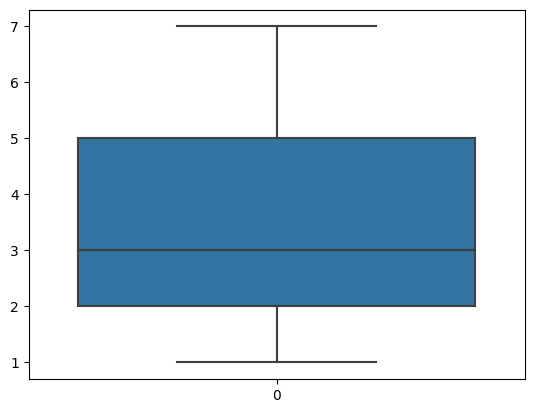

In [ ]:
sns.boxplot(data_capped_train["household_size"])

<Axes: >

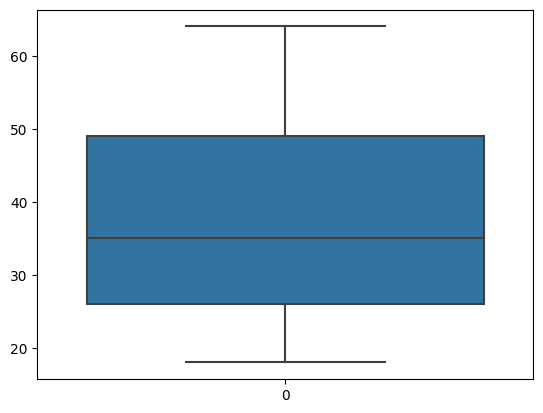

In [ ]:
sns.boxplot(data_capped_train["age_of_respondent"])

<Axes: >

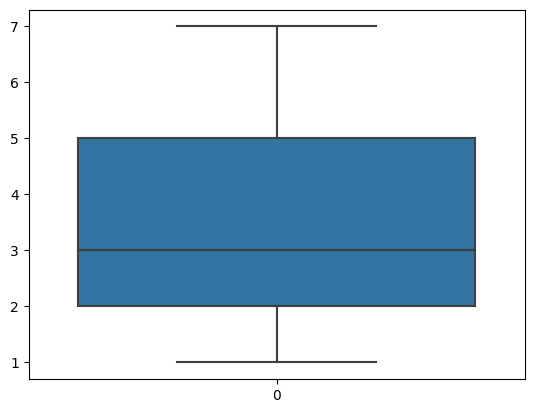

In [ ]:
sns.boxplot(data_capped_test["household_size"])

<Axes: >

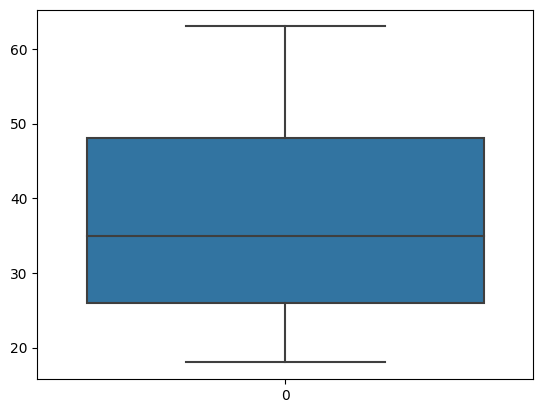

In [ ]:
sns.boxplot(data_capped_test["age_of_respondent"])

In [ ]:
train_dum.head()

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,bank_account_Yes,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,0,1,3,24,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,5,70,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,1,1,5,26,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,2018,0,1,5,34,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,8,26,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_capped_train.columns

Index(['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'bank_account_Yes',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Farming and Fishing', 'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Government Dependent',
       'job_type_Informa

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
train_dum1=scaler.fit_transform(data_capped_train)
test_dum1=scaler.fit_transform(data_capped_test)

In [ ]:
train_dum1.shape

(23524, 33)

In [ ]:
# converting the numpyarray into dataframe

data_capped_train=pd.DataFrame(data=train_dum1,columns=data_capped_train.columns)
data_capped_test=pd.DataFrame(data=test_dum1,columns=data_capped_test.columns)

# Model Creation

In [ ]:
# Train and test data are already available, so no need to split
# The Target variable here is bank_account (yes/No) and hence its a classification problem
# The models that are going to be used in Logistic regression, Decision Tree,KNN,SVM,Naive Bayes

## Logistic Regression Model

### Model creation

In [ ]:
x=data_capped_train.drop(columns="bank_account_Yes")
y=data_capped_train["bank_account_Yes"]


In [ ]:
## Splitting x & y variable for train and test data
x_train, x_val_test, y_train, y_val_test=train_test_split(x, y, test_size=.1, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

### Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report,mean_squared_error

In [ ]:
print("Train Accuracy", lr.score(x_train,y_train))
print("Test Accuracy", lr.score(x_val_test,y_val_test))

Train Accuracy 0.8715223654999764
Test Accuracy 0.8691032724181895


In [ ]:
predicted_y_val_test_log=lr.predict(x_val_test)

In [ ]:
print(metrics.classification_report(predicted_y_val_test_log,y_val_test))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      2246
         1.0       0.21      0.69      0.32       107

    accuracy                           0.87      2353
   macro avg       0.60      0.78      0.63      2353
weighted avg       0.95      0.87      0.90      2353



In [ ]:
metrics.confusion_matrix(predicted_y_val_test_log,y_val_test)

array([[1971,  275],
       [  33,   74]])

In [ ]:
rmse=np.sqrt(mean_squared_error(y_val_test,predicted_y_val_test_log))
rmse

0.36179652787417743

## Decision Tree Classifier

### Model Creation


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt0=DecisionTreeClassifier()

In [ ]:
dt0.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Train Accuracy", dt0.score(x_train,y_train))
print("Test Accuracy", dt0.score(x_val_test,y_val_test))

Train Accuracy 0.9688252798639648
Test Accuracy 0.8176795580110497


### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dt1=DecisionTreeClassifier()


In [ ]:
parameters={"criterion":["gini","entropy"],
           "max_depth":[3,4,5,6,7],
           "min_samples_split":[10,15,20,25],
           "min_samples_leaf":[5,10,20,30]}

In [ ]:
gsearch0=GridSearchCV(estimator=dt1,param_grid=parameters,cv=5,n_jobs=1)

In [ ]:
gsearch0.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [10, 15, 20, 25]})

In [ ]:
gsearch0.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [ ]:
dt1=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=5,min_samples_split=10)

In [ ]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=10)

### Evaluation

In [ ]:
print("Train score: ",dt1.score(x_train,y_train))
print("Test score: ",dt1.score(x_val_test,y_val_test))

Train score:  0.8600444003589817
Test score:  0.8516787080322992


In [ ]:
predicted_y_val_test_dt=dt1.predict(x_val_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
print(metrics.classification_report(predicted_y_val_test_dt,y_val_test))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      2353
         1.0       0.00      0.00      0.00         0

    accuracy                           0.85      2353
   macro avg       0.50      0.43      0.46      2353
weighted avg       1.00      0.85      0.92      2353



In [ ]:
metrics.confusion_matrix(predicted_y_val_test_dt,y_val_test)

array([[2004,  349],
       [   0,    0]])

In [ ]:
rmse=np.sqrt(mean_squared_error(y_val_test,predicted_y_val_test_dt))

In [ ]:
rmse

0.3851250342001943

##KNN


### Model Creation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNNmodel=KNeighborsClassifier(n_neighbors=15)

In [ ]:
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
KNNmodel.score(x_train,y_train)

0.8849841764678097

In [ ]:
KNNmodel.score(x_val_test,y_val_test)

0.8695282617934552

In [ ]:
predicted_y_val_test_knn=KNNmodel.predict(x_val_test)

In [ ]:
print(metrics.classification_report(predicted_y_val_test_knn,y_val_test))

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93      2167
         1.0       0.33      0.61      0.43       186

    accuracy                           0.87      2353
   macro avg       0.65      0.75      0.68      2353
weighted avg       0.91      0.87      0.89      2353



In [ ]:
metrics.confusion_matrix(predicted_y_val_test_knn,y_val_test)

array([[1932,  235],
       [  72,  114]])

In [ ]:
rmse=np.sqrt(mean_squared_error(y_val_test,predicted_y_val_test_knn))

In [ ]:
rmse

0.36120871834238005

## XGboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
x_train

,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Head of Household,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
9778,0.0,0.0,1.0,0.500000,0.065217,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6894,0.0,0.0,1.0,0.500000,0.130435,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16638,0.5,1.0,0.0,0.166667,0.260870,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5777,1.0,0.0,1.0,0.666667,1.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2578,1.0,0.0,1.0,0.333333,0.152174,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,0.0,1.0,1.000000,0.826087,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,0.5,1.0,1.0,0.166667,0.695652,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9845,0.0,1.0,1.0,0.500000,0.304348,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10799,0.0,0.0,0.0,0.833333,0.217391,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("Train accuracy", xgb.score(x_train,y_train) )
print("Validation Test accuracy", xgb.score(x_val_test,y_val_test) )

Train accuracy 0.9069009494119314
Validation Test accuracy 0.8674033149171271


In [ ]:
params = {
    'n_estimators': [50,100],
    'learning_rate': [0.01,0.1],
    'booster': ['gbtree'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 1],
    'base_score': [0.1,0.2, 0.5, 1],
    'max_depth':[3,5,8]
}
xgb1=XGBClassifier(n_jobs=-1)
gs2 = GridSearchCV(estimator=xgb1,param_grid= params, n_jobs=-1, cv=5, scoring='accuracy')
gs2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.1, 0.2, 0.5, 1],
                         'booster': ['gbtree'], 'gamma': [0.5, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 8],
                         'n_estimators': [50, 100], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5, 1]},
             scoring='accuracy')

In [ ]:
gs2.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 50,
 'reg_alpha': 0.5,
 'reg_lambda': 1}

In [ ]:
#xgb1=XGBClassifier(base_score=0.2,max_depth=6,booster="gbtree",gamma=0.5,learning_rate=0.1,n_estimators=45,reg_alpha=0.5,reg_lambda=1)
#my_model3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 5)
xgb1=XGBClassifier(base_score=0.2,max_depth=6,booster="gbtree",gamma=0.5,learning_rate=0.1,n_estimators=45,reg_alpha=0.5,reg_lambda=1)
xgb1.fit(x_train, y_train)
print("Train accuracy", xgb1.score(x_train,y_train) )
print("Validation Test accuracy", xgb1.score(x_val_test,y_val_test) )

Train accuracy 0.8843701289499788
Validation Test accuracy 0.8720781980450488


In [ ]:
predicted_y_val_test_xgb1=xgb1.predict(x_val_test)
print(metrics.classification_report(predicted_y_val_test_xgb1,y_val_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2223
           1       0.26      0.68      0.37       130

    accuracy                           0.87      2353
   macro avg       0.62      0.78      0.65      2353
weighted avg       0.94      0.87      0.90      2353



In [ ]:
rmse=np.sqrt(mean_squared_error(y_val_test,predicted_y_val_test_xgb1))

In [ ]:
rmse

0.3576615746134202

In [ ]:
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val_test,predicted_y_val_test_xgb1))

Error rate of XGB classifier:  0.12792180195495118


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print("Train accuracy", rf.score(x_train,y_train) )
print("Validation Test accuracy", rf.score(x_val_test,y_val_test) )

Train accuracy 0.9688252798639648
Validation Test accuracy 0.852953676158096


## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf1=RandomForestClassifier(random_state=42)

In [ ]:
parameters={'max_depth':[7,10],
             'min_samples_split':[6,10],
             'n_estimators':[50,70],
             'bootstrap': [True],
             'max_features': ['auto', 'log2'],
             'criterion': ['entropy', "gini"]
                              }

In [ ]:
gsearch1=GridSearchCV(estimator=rf1,param_grid=parameters,n_jobs=-1,cv=5,verbose=1)

In [ ]:
gsearch1.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 10], 'max_features': ['auto', 'log2'],
                         'min_samples_split': [6, 10],
                         'n_estimators': [50, 70]},
             verbose=1)

In [ ]:
print("Train accuracy", gsearch1.score(x_train,y_train) )
print("Validation Test accuracy", gsearch1.score(x_val_test,y_val_test) )

Train accuracy 0.8785130603183601
Validation Test accuracy 0.8652783680407989


In [ ]:
predicted_y_val_test_rf=gsearch1.predict(x_val_test)

In [ ]:
print(metrics.classification_report(predicted_y_val_test_rf,y_val_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      2271
         1.0       0.16      0.70      0.26        82

    accuracy                           0.87      2353
   macro avg       0.58      0.78      0.60      2353
weighted avg       0.96      0.87      0.90      2353



In [ ]:
rmse=np.sqrt(mean_squared_error(y_val_test,predicted_y_val_test_rf))
rmse

0.3670444550176464

# Prediction Using Logistic Regression,KNN and DecisionTree

In [ ]:
x_test=data_capped_test

In [ ]:
logpredicted_y=lr.predict(x_test)
knnpredicted_y=KNNmodel.predict(x_test)
dtpredicted_y=dt1.predict(x_test)
xgbpredicted_y=xgb1.predict(x_test)

In [ ]:
results=test.copy()


In [ ]:
results["uniqueid"]=results["uniqueid"]+" x "+results["country"]
results["bank_account_log"]=logpredicted_y
results["bank_account_knn"]=knnpredicted_y
results["bank_account_dt"]=dtpredicted_y
results["bank_account"]=xgbpredicted_y
results["comparison"]=results['bank_account_log']==results['bank_account_dt']

#Evaluation

## Out of all 3 models. logistic regression performs the best.The predicted values are thus summarised as below

In [ ]:
print("Error rate Logistic Regression classifier: ", 1 - accuracy_score(y_val_test,predicted_y_val_test_log))
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val_test,predicted_y_val_test_rf))
print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_val_test,predicted_y_val_test_dt))
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val_test,predicted_y_val_test_xgb1))

Error rate Logistic Regression classifier:  0.13089672758181048
Error rate of Random Forest classifier:  0.13472163195920106
Error rate of Extra Tree classifier:  0.14832129196770083
Error rate of XGB classifier:  0.12792180195495118


In [ ]:
submission=results[["uniqueid","bank_account"]]

In [ ]:
submission

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,1
10084,uniqueid_3001 x Uganda,0


In [ ]:
submission.to_csv('first_submission.csv', index = False)

In [ ]:
pd.read_csv('first_submission.csv')


,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,1
10084,uniqueid_3001 x Uganda,0
